# Modeled solar irradiance data

In this tutorial, you will learn how to retrieve modeled solar irradiance data from various data sources.

The objective of the exercise is to calculate the annual irradiance from different sources, as an indicator of the differences between the data sources.

In [1]:
# Install pvlib on Google Colab as this is not a standard package.
!pip install pvlib

In [2]:
import pvlib  # library for PV and solar calculations
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting
import numpy as np  # library for math and linear algebra

## Step 1: Explore the PVGIS data viewer
Visit the [PVGIS website](https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis_en) to familiarize yourself with the various data retrieval options.

To access data, click the "Visit PVGIS" button on the main landing page.

You will notice 7 different tabs indicating different data options. Click on the "Hourly data" tab. Now, click on different parts of the world and inspect which options are available for the "Solar radiation database" drop-down menu. Are there always multiple options available? *Hint: look for the maximum latitude covered by satellite-derived data.*


<br>

## Step 2: Retrieve satellite-derived irradiance from PVGIS
Once you've familiarized yourself with PVGIS, it is time to retrieve time series of solar irradiance from PVGIS. This can be done from the website interface, but for most analyses it is more convenient to import it directly to Python.

Use the pvlib-python function [get_pvgis_hourly](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_hourly.html) to retrieve irradiance. Note that most of the input parameters are optional; for this exercise, we only want to retrieve data for 2020.

In [3]:
latitude = 55.79
longitude = 12.52

# Write your code here

#### SOLUTION #####
data, meta = pvlib.iotools.get_pvgis_hourly(
    latitude=latitude,
    longitude=longitude,
    start=2020,
    end=2020,
)

data.head()

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int
time,,,,,,,
2020-01-01 00:11:00+00:00,0.0,0.0,0.0,0.0,2.59,5.31,0
2020-01-01 01:11:00+00:00,0.0,0.0,0.0,0.0,2.75,5.38,0
2020-01-01 02:11:00+00:00,0.0,0.0,0.0,0.0,3.07,5.24,0
2020-01-01 03:11:00+00:00,0.0,0.0,0.0,0.0,3.33,5.45,0
2020-01-01 04:11:00+00:00,0.0,0.0,0.0,0.0,3.75,5.59,0


## Step 3: Calculate GHI from POA components

PVGIS returns the plane-of-array (POA) components, because the service is able to transpose the irradiance to a user specified surface tilt and azimuth. The default setting is for the components to be on horizontal (``surface tilt=0``).'

In this step, calculate the GHI based on the POA component. Before inspecting the data, think about what the ground reflected irradiance is for a horizontal surface?

In [4]:
# Write your code here

data['ghi'] = data['poa_direct'] + data['poa_sky_diffuse']

## Step 4: Inspect the returned data

Explore the returned data. Notice that the components are called "POA_*". The reason for this is that PVGIS allows for returning irradiance for tilted surfaces. Go back to the documentation and determine which two input parameters could be used to specify a different surface orientation.

Note that the default surface is a horizontal surface. Therefore, you may add the individual components to calculate GHI.

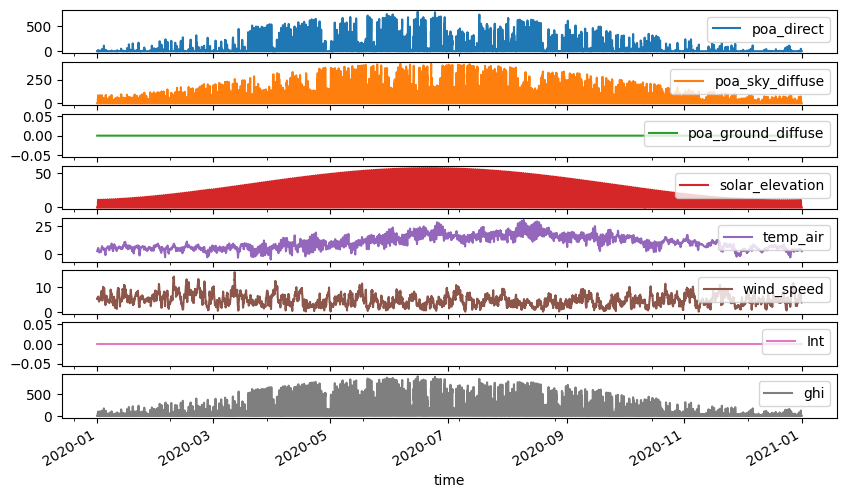

In [5]:
# Write your code here

#### SOLUTION ####
data.plot(subplots=True, sharex=True, figsize=(10, 6));

## Step 5: Determine which database was used
For the data retrieval above, we did not specify which radiation database to use. Therefore, the default database for the specified location was used.

Inspect the metadata object (the second object returned) to determine which database was used for the retrieval. Is this a satellite-based or a renalaysis datatset?

In [6]:
# Write your code here

#### SOLUTION ####
# you can inspect the content of the meta dictionary by simply writing meta and executing the cell
# The meta dictionary contains a number of nested dictionaries (meaning an element of a dictionary entry is a new dictionary)
# The fourth line contains a dictionary entry called 'radiation_db' which specified that the database was PVGIS-SARAH3
meta

{'inputs': {'location': {'latitude': 55.79,
   'longitude': 12.52,
   'elevation': 40.0},
  'meteo_data': {'radiation_db': 'PVGIS-SARAH3',
   'meteo_db': 'ERA5',
   'year_min': 2020,
   'year_max': 2020,
   'use_horizon': True,
   'horizon_db': None,
   'horizon_data': 'DEM-calculated'},
  'mounting_system': {'fixed': {'slope': {'value': 0, 'optimal': False},
    'azimuth': {'value': 0, 'optimal': False},
    'type': 'free-standing'}},
  'pv_module': {'technology': None, 'peak_power': None, 'system_loss': None},
  'descriptions': {'location': {'description': 'Selected location',
    'variables': {'latitude': {'description': 'Latitude',
      'units': 'decimal degree'},
     'longitude': {'description': 'Longitude', 'units': 'decimal degree'},
     'elevation': {'description': 'Elevation', 'units': 'm'}}},
   'meteo_data': {'description': 'Sources of meteorological data',
    'variables': {'radiation_db': {'description': 'Solar radiation database'},
     'meteo_db': {'description': 'Dat

In [7]:
meta['inputs']['meteo_data']['radiation_db']

'PVGIS-SARAH3'

## Step 6: Retrieve reanalysis irradiance

For the same location, use the PVGIS function again, but this time specify that the data source should be reanalysis data from ERA5.

*Hint: the radiation database can be specified using the keyword `raddatabase='PVGIS-ERA5'`.*

As done for the first dataset, calculate GHI from the POA components.

In [8]:
# Write your code here
# data_era5, meta_era5 = 

#### SOLUTION ####
data_era5, meta_era5 = pvlib.iotools.get_pvgis_hourly(
    latitude=latitude,
    longitude=longitude,
    start=2020,
    end=2020,
    raddatabase='PVGIS-ERA5',
)

data_era5['ghi'] = data_era5['poa_direct'] + data_era5['poa_sky_diffuse']

data.head()

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,ghi
time,,,,,,,,
2020-01-01 00:11:00+00:00,0.0,0.0,0.0,0.0,2.59,5.31,0,0.0
2020-01-01 01:11:00+00:00,0.0,0.0,0.0,0.0,2.75,5.38,0,0.0
2020-01-01 02:11:00+00:00,0.0,0.0,0.0,0.0,3.07,5.24,0,0.0
2020-01-01 03:11:00+00:00,0.0,0.0,0.0,0.0,3.33,5.45,0,0.0
2020-01-01 04:11:00+00:00,0.0,0.0,0.0,0.0,3.75,5.59,0,0.0


## Step 6: Retrieve irradiance from CAMS

In this step, you will retrieve irradiance data from a different source: the CAMS Radiation database.

For this task, you can use the pvlib function [get_cams](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_cams.html). Again, request data for 2020 for the same location. Make sure to select ``identifier='cams_radiation'`` to retrieve irradiance data (otherwise only clear sky irradiance is retrieved.

Note that accessing CAMS data requires you to register for a user. For this exercise, you can use my email address as the credentials (no password is needed).

In [9]:
# Write your code here

#### SOLUTION ####
data_cams, meta_cams = pvlib.iotools.get_cams(
    latitude=latitude,
    longitude=longitude,
    start='2020-01-01',
    end='2020-12-31 23:59',
    email='redacted',
    identifier='cams_radiation',
)

data_cams.head()

,Observation period,ghi_extra,ghi_clear,bhi_clear,dhi_clear,dni_clear,ghi,bhi,dhi,dni,Reliability
2020-01-01 00:00:00+00:00,2020-01-01T00:00:00.0/2020-01-01T01:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-01 01:00:00+00:00,2020-01-01T01:00:00.0/2020-01-01T02:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-01 02:00:00+00:00,2020-01-01T02:00:00.0/2020-01-01T03:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-01 03:00:00+00:00,2020-01-01T03:00:00.0/2020-01-01T04:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-01 04:00:00+00:00,2020-01-01T04:00:00.0/2020-01-01T05:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Step 7: Compare the annual irradiance

The last step of this exercise is to compare the annual GHI obtained for the same location and year from different data sources. What is the maximum difference?

You may also compare the irradiance to the long-term average GHI from the [Global Solar Atlas](http://globalsolaratlas.info/map).

In [14]:
# Write your code here

#### SOLUTION ####
components = ['ghi', 'dhi', 'dni']

data_bases = {
    'SARAH3': data,
    'ERA5': data_era5,
    'CAMS': data_cams,
}

annual_irradiance = pd.Series()
for db, dataframe in data_bases.items():
    annual_irradiance[db] = dataframe['ghi'].sum()*10**-3

annual_irradiance.round(0)

SARAH3    1075.0
ERA5      1060.0
CAMS      1081.0
dtype: float64

In [15]:
#### SOLUTION ####
# The values above show the annual GHI irradiance in kWh/m^2 from the three different databases.
# The maximum difference is 2%, which is to be expected for publicly available satellite-derived irradiance datasets.